In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf

In [2]:
from keras.datasets import cifar10
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

In [3]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((50000, 32, 32, 3), (10000, 32, 32, 3), (50000, 1), (10000, 1))

In [4]:
y_train

array([[6],
       [9],
       [9],
       ...,
       [9],
       [1],
       [1]], dtype=uint8)

[5]


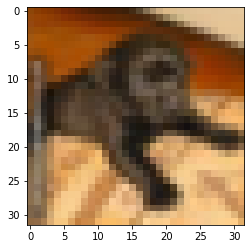

In [5]:
i = 56
plt.imshow(X_train[i])
print(y_train[i])

In [6]:
np.arange(10)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [7]:
list(range(10))

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

In [8]:
names = ['Airplane', 'Car', 'Bird', 'Cat', 'Deer', 'Dog', 'Frog', 'Horse', 'Ship', 'Truck']

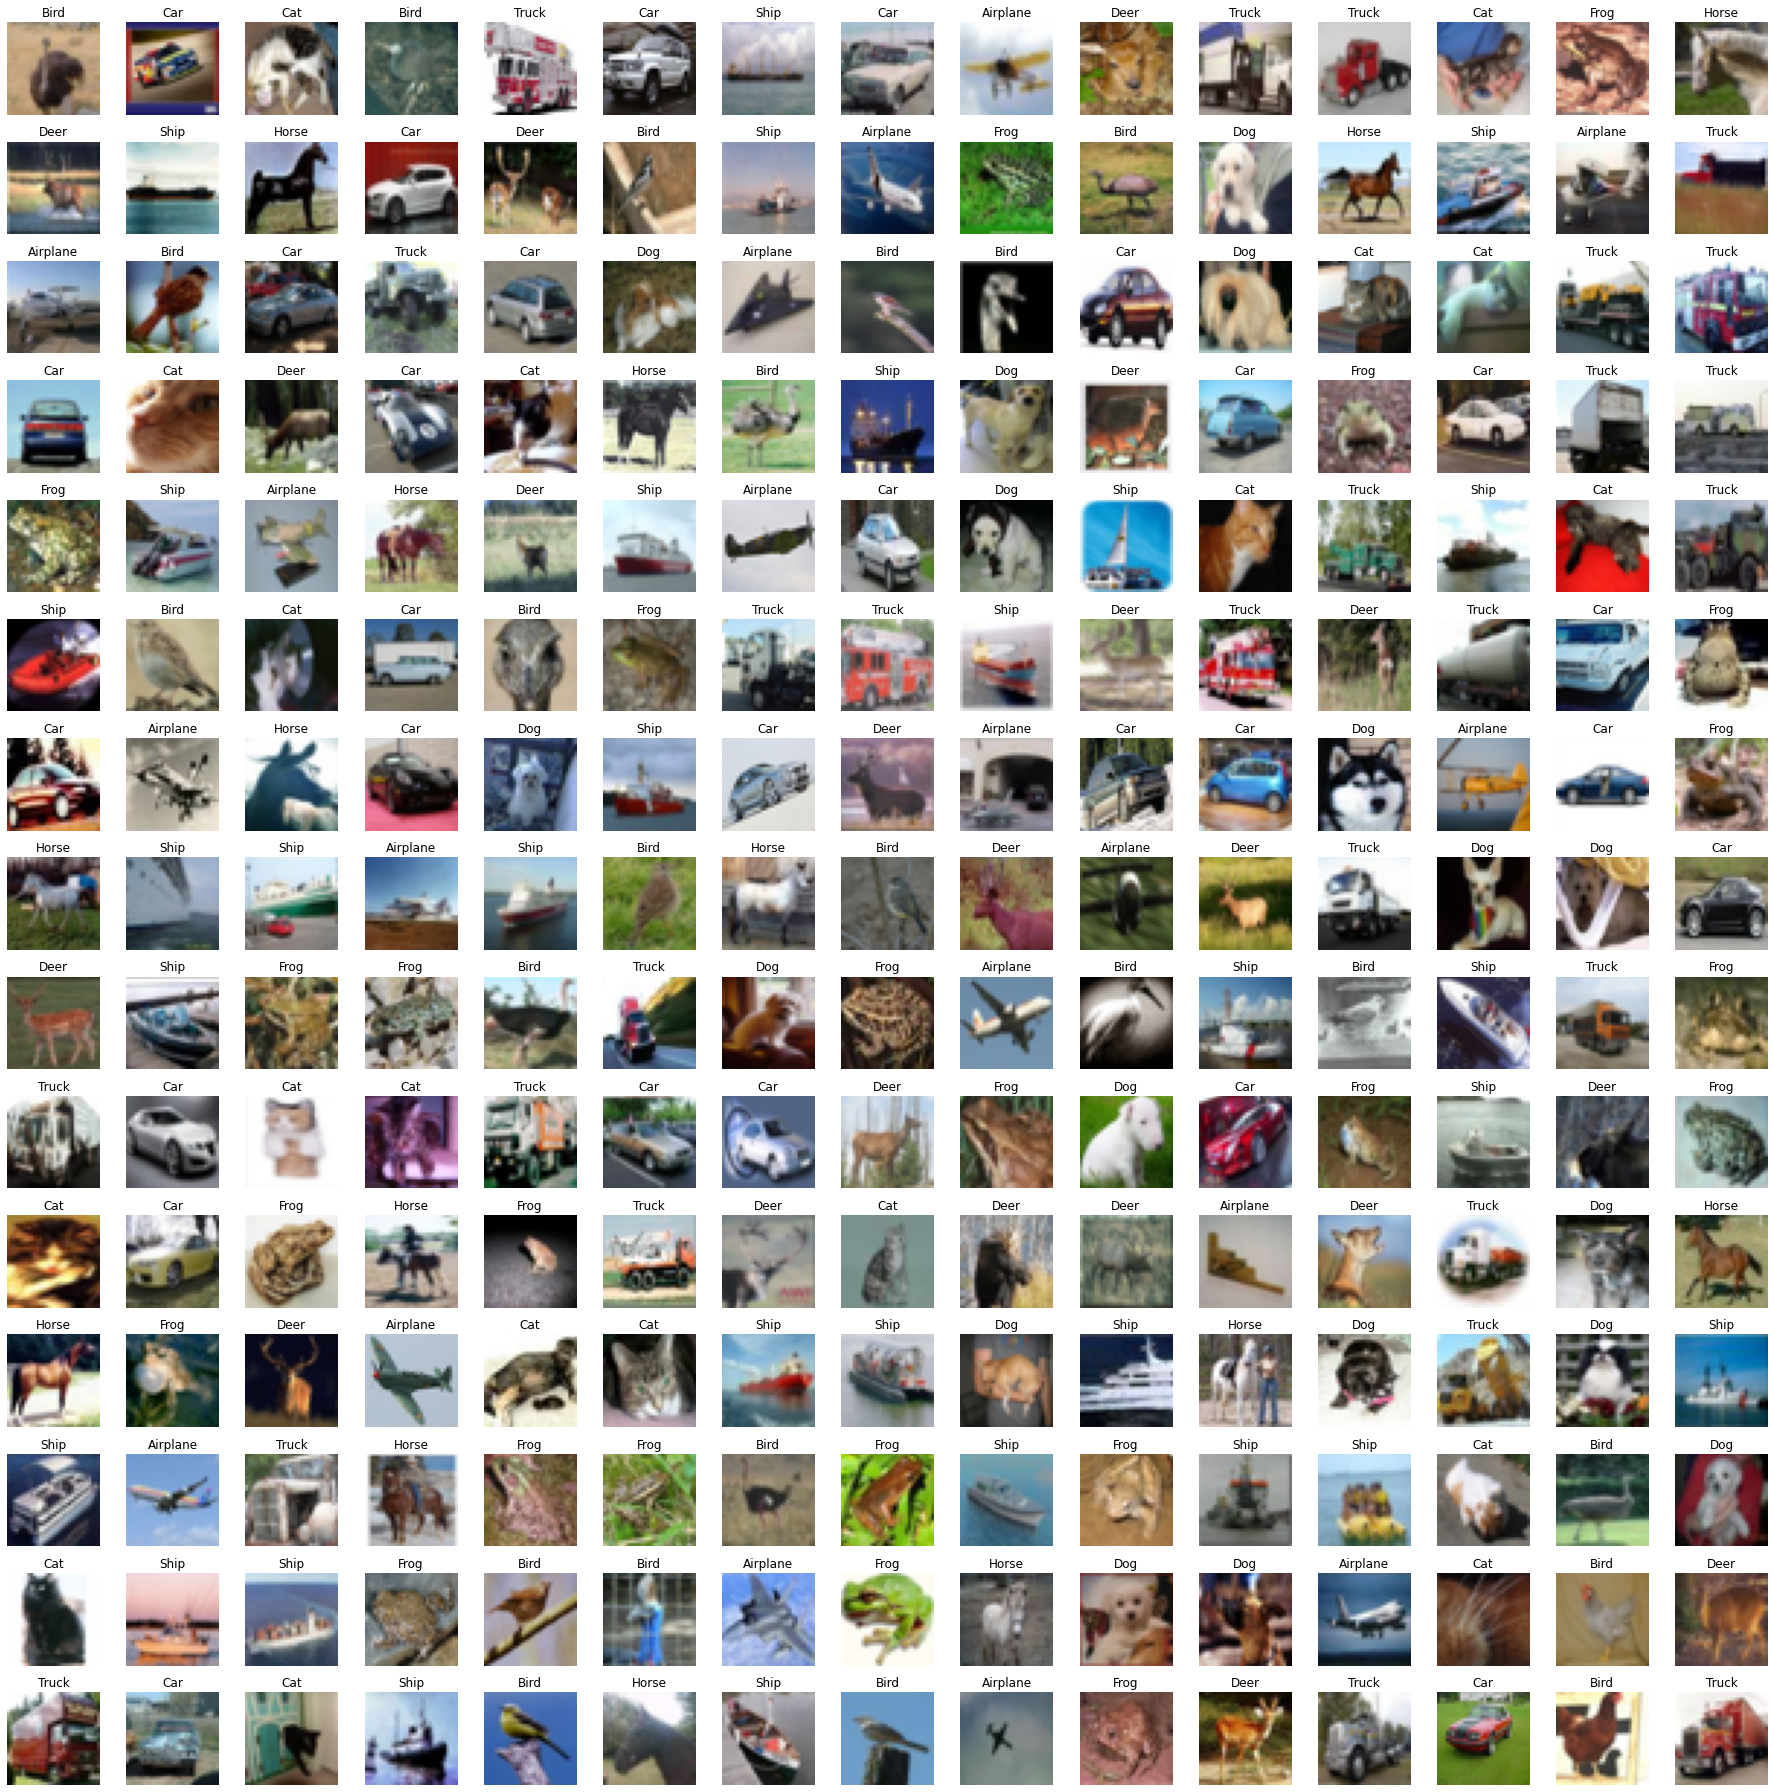

In [9]:
W_grid = 15
L_grid = 15

fig, axes = plt.subplots(L_grid, W_grid, figsize = (25, 25))
axes = axes.ravel()

n_train = len(X_train)

for i in np.arange(0, L_grid * W_grid):
    index = np.random.randint(0, n_train)
    axes[i].imshow(X_train[index])
    axes[i].set_title(names[y_train[index][0]])
    axes[i].axis('off')
    
# plt.subplots_adjust(hspace = 0.4)
plt.tight_layout()

In [10]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

number_cat = 10

In [11]:
y_test = tf.keras.utils.to_categorical(y_test, number_cat)
y_train = tf.keras.utils.to_categorical(y_train, number_cat)

In [12]:
X_train = X_train/255
X_test = X_test/255

In [13]:
X_train.shape

(50000, 32, 32, 3)

In [14]:
Input_shape = X_train.shape[1:]

In [15]:
Input_shape

(32, 32, 3)

In [16]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, AveragePooling2D, Dense, Flatten, Dropout
from tensorflow.keras.optimizers import Adam
from keras.callbacks import TensorBoard

In [17]:
cnn_model = Sequential()

cnn_model.add(Conv2D(filters = 64, kernel_size = (3, 3), activation = 'relu', input_shape = Input_shape))
cnn_model.add(Conv2D(filters = 64, kernel_size = (3, 3), activation = 'relu'))
cnn_model.add(MaxPooling2D(2, 2))
cnn_model.add(Dropout(0.3))

cnn_model.add(Conv2D(filters = 128, kernel_size = (3, 3), activation = 'relu'))
cnn_model.add(Conv2D(filters = 128, kernel_size = (3, 3), activation = 'relu'))
cnn_model.add(MaxPooling2D(2, 2))
cnn_model.add(Dropout(0.2))

cnn_model.add(Flatten())
cnn_model.add(Dense(units = 512, activation = 'relu'))
cnn_model.add(Dense(units = 256, activation = 'relu'))
cnn_model.add(Dense(units = 10, activation = 'softmax'))

In [18]:
cnn_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 30, 30, 64)        1792      
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 28, 28, 64)        36928     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 12, 12, 128)       73856     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 10, 10, 128)       147584    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 128)         0

In [19]:
cnn_model.compile(loss = 'categorical_crossentropy', optimizer = tf.keras.optimizers.RMSprop(learning_rate = 0.001), metrics = ['accuracy'])

In [20]:
history = cnn_model.fit(X_train, y_train, batch_size = 128, epochs = 10, shuffle = True, validation_split = 0.2)

Epoch 1/10
313/313 [==============================] - 13s 26ms/step - loss: 1.9108 - accuracy: 0.3079 - val_loss: 1.5219 - val_accuracy: 0.4523
Epoch 2/10
313/313 [==============================] - 8s 24ms/step - loss: 1.3875 - accuracy: 0.5087 - val_loss: 1.2900 - val_accuracy: 0.5354
Epoch 3/10
313/313 [==============================] - 8s 24ms/step - loss: 1.1066 - accuracy: 0.6118 - val_loss: 1.1731 - val_accuracy: 0.5905
Epoch 4/10
313/313 [==============================] - 8s 24ms/step - loss: 0.9133 - accuracy: 0.6842 - val_loss: 1.2716 - val_accuracy: 0.6229
Epoch 5/10
313/313 [==============================] - 8s 24ms/step - loss: 0.7673 - accuracy: 0.7339 - val_loss: 0.8636 - val_accuracy: 0.7010
Epoch 6/10
313/313 [==============================] - 8s 24ms/step - loss: 0.6492 - accuracy: 0.7756 - val_loss: 0.7740 - val_accuracy: 0.7391
Epoch 7/10
313/313 [==============================] - 8s 24ms/step - loss: 0.5422 - accuracy: 0.8110 - val_loss: 0.7842 - val_accuracy: 0.750

In [21]:
evaluation = cnn_model.evaluate(X_test, y_test)
print(f'Test Accuracy: {evaluation[1]}')

313/313 [==============================] - 1s 3ms/step - loss: 0.9472 - accuracy: 0.7427
Test Accuracy: 0.7426999807357788


In [22]:
predicted_classes = np.argmax(cnn_model.predict(X_test), 1)
predicted_names = [names[predicted_class] for predicted_class in predicted_classes]

In [23]:
y_test_ori = y_test.argmax(1)

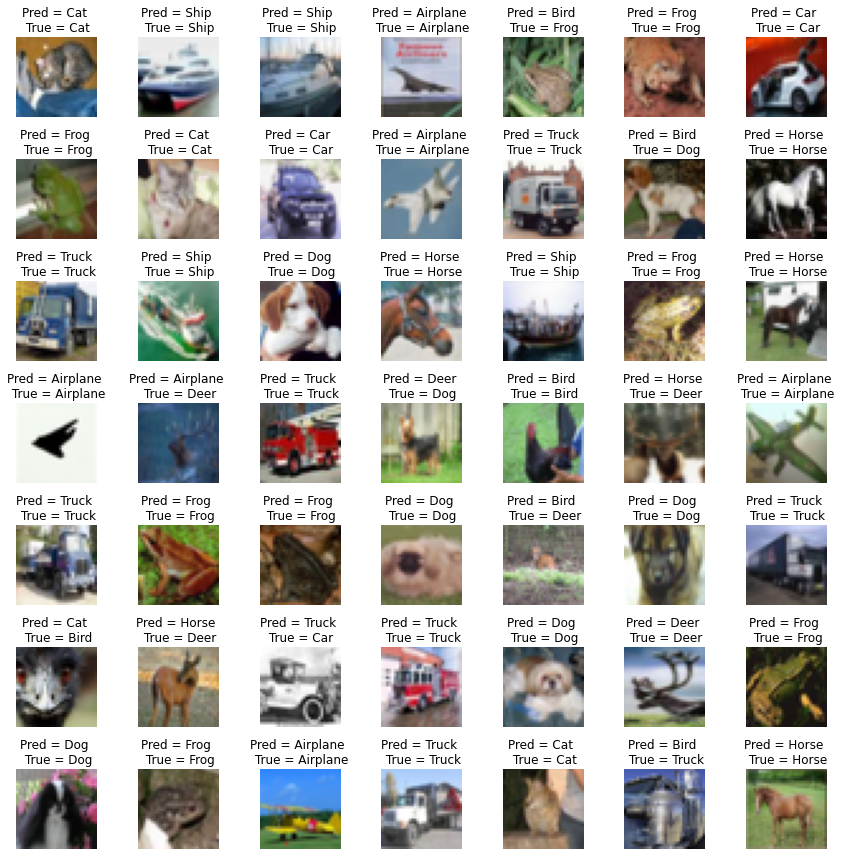

In [24]:
L = 7
W = 7
fig, axes = plt.subplots(L, W, figsize = (12,12))
axes = axes.ravel()

for i in np.arange(0, L * W):
    axes[i].imshow(X_test[i])
    axes[i].set_title(f'Pred = {predicted_names[i]} \n True = {names[y_test_ori[i]]}')
    axes[i].axis('off')

plt.tight_layout()
plt.show()

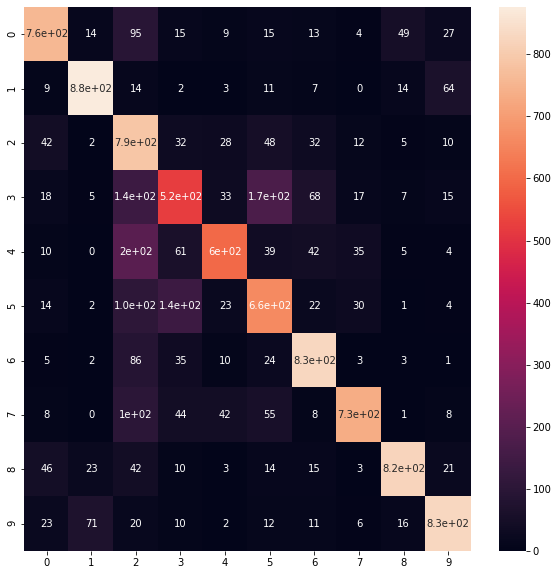

In [25]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test_ori, predicted_classes)
plt.figure(figsize = (10,10))
sns.heatmap(cm, annot = True)
plt.show()

In [26]:
import os
directory = os.path.join(os.getcwd(), 'saved_models')

if not os.path.isdir(directory):
    os.makedirs(directory)
model_path = os.path.join(directory, 'keras_cifer10_trained_model.h5')
# cnn_model.save(model_path)

In [27]:
n = 8
X_train_sample = X_train[:n]
X_train_sample.shape

(8, 32, 32, 3)

In [28]:
from keras.preprocessing.image import ImageDataGenerator
datagen_train = ImageDataGenerator(rotation_range = 90)
# datagen_train = ImageDataGenerator(width_shift_range = 0.5)
# datagen_train = ImageDataGenerator(brightness_range = (0.001, 0.03))
datagen_train.fit(X_train_sample)

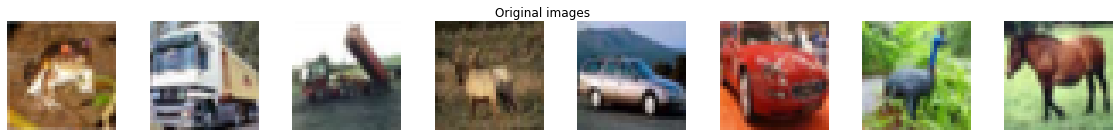

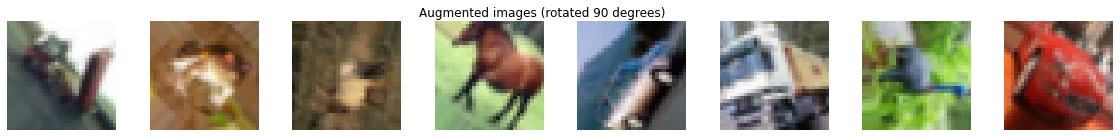

In [29]:
fig = plt.figure(figsize = (20, 2))

for i in range(n):
    ax = fig.add_subplot(1, n, i + 1)
    ax.imshow(X_train_sample[i])
    ax.axis('off')
fig.suptitle('Original images')

fig = plt.figure(figsize = (20, 2))
for X_batch in datagen_train.flow(X_train_sample, batch_size = n):
    for i in range(n):
        ax = fig.add_subplot(1, n, i + 1)
        ax.imshow(X_batch[i])
        ax.axis('off')
    fig.suptitle('Augmented images (rotated 90 degrees)')
    plt.show()
    break

In [30]:
datagen = ImageDataGenerator(rotation_range = 45,
                            horizontal_flip = True,
                            width_shift_range = 0.1,
                            height_shift_range = 0.1)

In [31]:
datagen.fit(X_train)

In [32]:
cnn_model = Sequential()

cnn_model.add(Conv2D(filters = 64, kernel_size = (3, 3), activation = 'relu', input_shape = Input_shape))
cnn_model.add(Conv2D(filters = 64, kernel_size = (3, 3), activation = 'relu'))
cnn_model.add(MaxPooling2D(2, 2))
cnn_model.add(Dropout(0.3))

cnn_model.add(Conv2D(filters = 128, kernel_size = (3, 3), activation = 'relu'))
cnn_model.add(Conv2D(filters = 128, kernel_size = (3, 3), activation = 'relu'))
cnn_model.add(MaxPooling2D(2, 2))
cnn_model.add(Dropout(0.2))

cnn_model.add(Flatten())
cnn_model.add(Dense(units = 512, activation = 'relu'))
cnn_model.add(Dense(units = 256, activation = 'relu'))
cnn_model.add(Dense(units = 10, activation = 'softmax'))

cnn_model.compile(loss = 'categorical_crossentropy', optimizer = tf.keras.optimizers.RMSprop(learning_rate = 0.001), metrics = ['accuracy'])

cnn_model.fit(datagen.flow(X_train, y_train, batch_size = 128), epochs = 20)

Epoch 1/20
391/391 [==============================] - 16s 40ms/step - loss: 1.9319 - accuracy: 0.3008
Epoch 2/20
391/391 [==============================] - 16s 40ms/step - loss: 1.5740 - accuracy: 0.4352
Epoch 3/20
391/391 [==============================] - 15s 39ms/step - loss: 1.3922 - accuracy: 0.5032
Epoch 4/20
391/391 [==============================] - 16s 40ms/step - loss: 1.2634 - accuracy: 0.5523
Epoch 5/20
391/391 [==============================] - 16s 40ms/step - loss: 1.1640 - accuracy: 0.5899
Epoch 6/20
391/391 [==============================] - 15s 39ms/step - loss: 1.0985 - accuracy: 0.6147
Epoch 7/20
391/391 [==============================] - 15s 39ms/step - loss: 1.0324 - accuracy: 0.6392
Epoch 8/20
391/391 [==============================] - 15s 40ms/step - loss: 0.9930 - accuracy: 0.6541
Epoch 9/20
391/391 [==============================] - 15s 39ms/step - loss: 0.9586 - accuracy: 0.6646
Epoch 10/20
391/391 [==============================] - 15s 39ms/step - loss: 0.932

In [33]:
score = cnn_model.evaluate(X_test, y_test)
print('Test accuracy: ', score[1])

313/313 [==============================] - 1s 3ms/step - loss: 0.7447 - accuracy: 0.7560
Test accuracy:  0.7559999823570251


In [34]:
import os
directory = os.path.join(os.getcwd(), 'saved_models')

if not os.path.isdir(directory):
    os.makedirs(directory)
model_path_aug = os.path.join(directory, 'keras_cifer10_trained_model_aug.h5')
cnn_model.save(model_path_aug)